# **CODESOFT**
#**Data Science - Internship**
# **Author : Afnan Ansari**
# **Task No 3 : Sales Price Prediction**


*   *Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.*
*   *In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let'
s embark on
the journey of sales prediction using machine learning in Python.*


### **Supervised Learning** -> Using Linear Regression
### **Dataset Link** => (https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)



#**1) COLLECTING DATA**

*Importing Libraries*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression

*Loading Data*

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **2) ANALYZING DATA**

*Max Row of Sales Column*

In [3]:
max_sales_row = data.loc[data['Sales'].idxmax()]
max_sales_row

TV           276.9
Radio         48.9
Newspaper     41.8
Sales         27.0
Name: 175, dtype: float64

*Highest Ten Rows of Sales Column*

In [4]:
top_sales_rows = data.nlargest(10, 'Sales')
top_sales_rows

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
36,266.9,43.8,5.0,25.4
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
58,210.8,49.6,37.7,23.8


*Checkinnng Null Values*

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


*Checking Quartiles, mean, max and Total Values Count*

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


*Checking Sum of TV Column*

In [8]:
data['TV'].sum()

29408.5

*Checking Sum of Radio Column*

In [9]:
data['Radio'].sum()

4652.800000000001

*Checking Sum of Newspaper Column*

In [10]:
data['Newspaper'].sum()

6110.799999999999

*Checking Sum of Sales Column*

In [11]:
data['Sales'].sum()

3026.1000000000004

# **3) VISUALIZING DATA**

*Regression Plot For TV and Sales.*

<Axes: xlabel='Sales', ylabel='TV'>

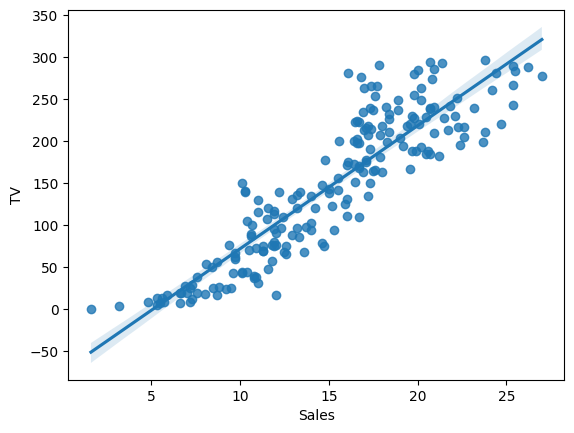

In [12]:
sns.regplot(data , x = 'Sales' , y = 'TV')

*Regression Plot For Radio and Sales.*

<Axes: xlabel='Sales', ylabel='Radio'>

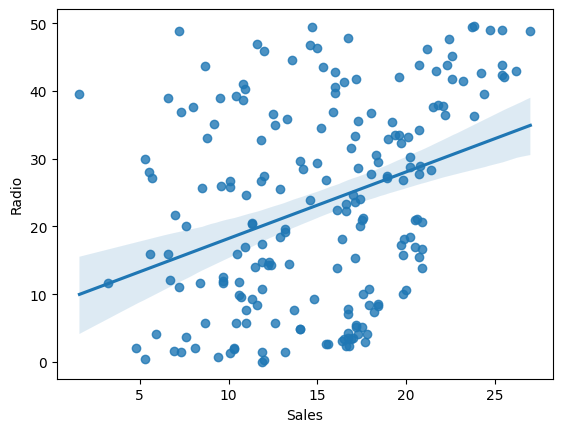

In [13]:
sns.regplot(data , x = 'Sales' , y = 'Radio')

*Regression Plot For Newspaper and Sales.*

<Axes: xlabel='Sales', ylabel='Newspaper'>

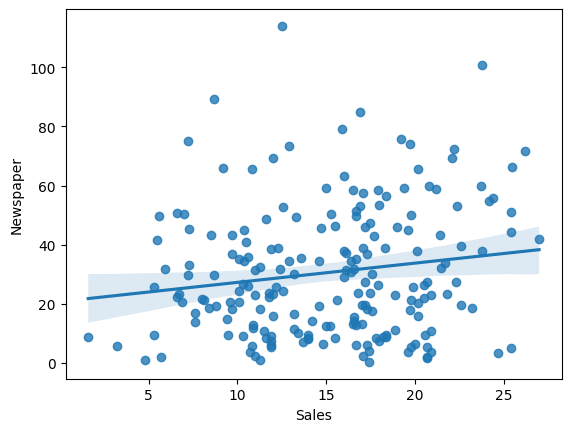

In [14]:
sns.regplot(data , x = 'Sales' , y = 'Newspaper')

*Histogram Plot For TV.*

<Axes: xlabel='TV', ylabel='Count'>

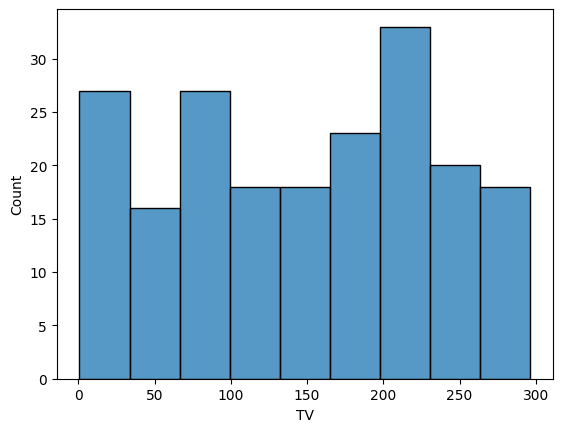

In [15]:
sns.histplot(data['TV'] )

*Histogram Plot For Radio*

<Axes: xlabel='Radio', ylabel='Count'>

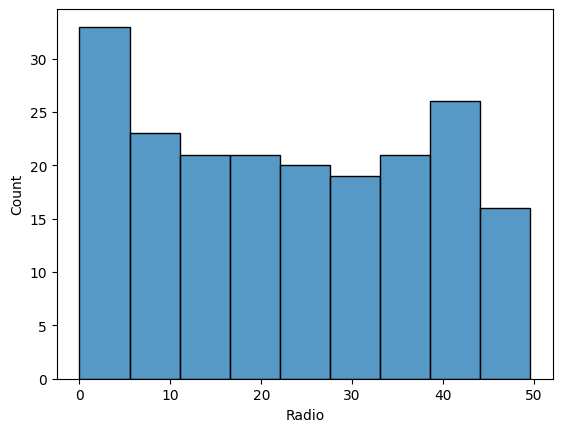

In [16]:
sns.histplot(data['Radio'])

*Histogram Plot For Newspaper.*

<Axes: xlabel='Newspaper', ylabel='Count'>

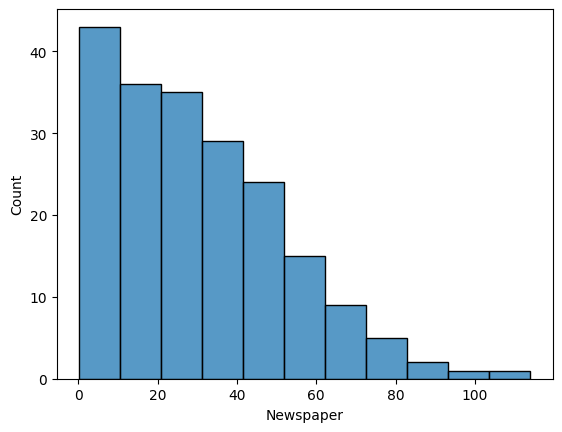

In [17]:
sns.histplot(data['Newspaper'] )

*Scatter Plot For All Columns.*

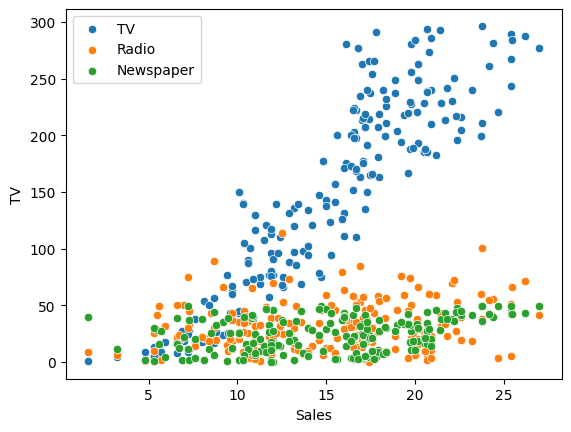

In [18]:
sns.scatterplot(data , x = 'Sales' , y = 'TV')
sns.scatterplot(data , x = 'Sales' , y = 'Newspaper')
sns.scatterplot(data , x = 'Sales' , y = 'Radio')
plt.legend(['TV' , 'Radio' , 'Newspaper'])

# **4) SCALING DATA TO NUMERIC**

*`.MinMaxScaler()` is used to scale numeric data  between 0 and 1*

In [19]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
minmax = MinMaxScaler()

In [21]:
columns = ['TV', 'Radio', 'Newspaper', 'Sales']
data[columns] = minmax.fit_transform(data[columns])
data

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.488189
197,0.596212,0.187500,0.053650,0.519685
198,0.956713,0.846774,0.579595,0.940945


#**5) SPLITTING DATA**



*   *Columns in X Variable are Independent Columns.*
*   *Columns in Y Variable are dependent Columns.*
*   *Dataset is Splitted into 80% and 20%.*



In [22]:
X = data.drop(['Sales'] , axis = 1)
Y = data['Sales']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.20 ,  random_state = 4 , shuffle = True)

In [23]:
X_train.count()

TV           160
Radio        160
Newspaper    160
dtype: int64

In [24]:
X_test.count()

TV           40
Radio        40
Newspaper    40
dtype: int64

In [25]:
Y_train.count()

160

In [26]:
Y_test.count()

40

#**6) MODEL SELECTION**

In [27]:
linear_regression = LinearRegression()

*Fitting the Data into model for Prediction.*

In [28]:
linear_regression.fit(X_train , Y_train)

LinearRegression()

# **7) PREDICTIONS**

In [29]:
linear_regression_Y_pred = linear_regression.predict(X_test)

In [30]:
linear_regression_Y_pred

array([0.67924104, 0.58122533, 0.79299547, 0.91673096, 0.37530086,
       0.79543816, 0.42794263, 0.51854238, 0.41516903, 0.64796988,
       0.85836661, 0.6544438 , 0.32464244, 0.52466243, 0.75398826,
       0.79232491, 0.77286855, 0.5600518 , 0.31643933, 0.75527688,
       0.65407148, 0.76513107, 0.84437939, 0.33015358, 0.80556796,
       0.74818901, 0.55985765, 0.37599393, 0.69442511, 0.37002609,
       0.39199792, 0.35103029, 0.58639293, 0.58875874, 0.65078005,
       0.2252233 , 0.61784532, 0.44769994, 0.61286924, 0.41421369])

#**8) ACCURACY REPORT**

In [31]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, linear_regression_Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, linear_regression_Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, linear_regression_Y_pred)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, linear_regression_Y_pred))

Mean Absolute Error:  0.043508364135729095
Mean Squared Error:  0.0031293424156482673
Root Mean Squared Error:  0.0559405257004997
Coefficient of Determination (R2 Score):  0.9046414171169505


#**9) Visualization of Actual and Predicted Output.**

In [32]:
Y_test.values.flatten()

array([0.62204724, 0.61417323, 0.90944882, 1.        , 0.34645669,
       0.79527559, 0.48818898, 0.59448819, 0.44488189, 0.61811024,
       0.88976378, 0.66141732, 0.40551181, 0.53543307, 0.62992126,
       0.75984252, 0.62204724, 0.62598425, 0.31496063, 0.79133858,
       0.61811024, 0.71653543, 0.93700787, 0.40551181, 0.8503937 ,
       0.71259843, 0.61023622, 0.4015748 , 0.68503937, 0.36220472,
       0.4015748 , 0.38188976, 0.61417323, 0.57086614, 0.56692913,
       0.19685039, 0.59448819, 0.47244094, 0.61417323, 0.42519685])

In [33]:
act_predict= pd.DataFrame({
    'Actual': Y_test.values.flatten(),
    'Predict': linear_regression_Y_pred.flatten()
})
act_predict.head(5)

,Actual,Predict
0,0.622047,0.679241
1,0.614173,0.581225
2,0.909449,0.792995
3,1.000000,0.916731
4,0.346457,0.375301


<Axes: >

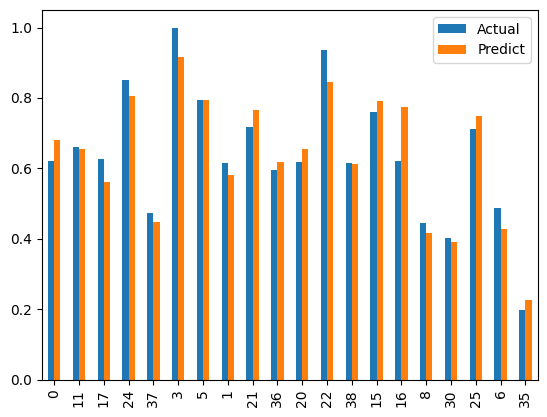

In [34]:
act_predict.sample(20).plot(kind='bar')